This notebook is designed to show whether the median is biased for low statistics, looking at normal & non-normal distributions. Can also consider e.g. raw mean to see if unbiased.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['font.size'] = 14

## Normal distribution

Start with a normal distribution. We will create `N_TRIAL` toy experiments, each with N entries, and for each toy experiment we will calculate the median. Thus for each N we can plot & calculate the estimated median & its variance, and see how this depends on N.

In [9]:
def run_toy_experiments_normal(n_toys, n_entries):
    data = np.random.normal(loc=1, scale=0.5, size=(n_toys, n_entries))
    return np.median(data, axis=1)

In [94]:
results_normal = {}
N_ENTRIES = [5, 10, 50, 100, 500, 1000]
N_TRIALS = 10000
for N in N_ENTRIES:
    data_normal = run_toy_experiments_normal(N_TRIALS, N)
    results_normal[N] = data_normal

In [104]:
def do_plot(this_n):
    plt.hist(results_normal[this_n], bins=50);
    this_mean = results_normal[this_n].mean()
    this_std = results_normal[this_n].std()
    plt.axvline(this_mean, color='red', label='mean');
    plt.suptitle("N = %d (mean = %g, std = %g)" % (this_n, this_mean, this_std));
    plt.xlabel("Median per toy experiment");

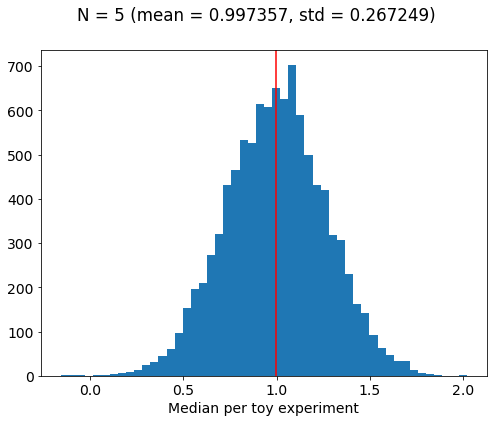

In [105]:
do_plot(5)

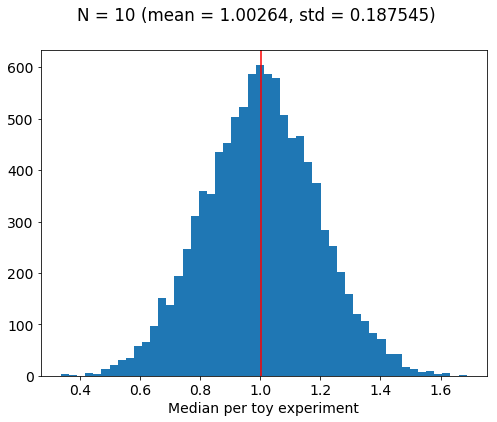

In [106]:
do_plot(10)

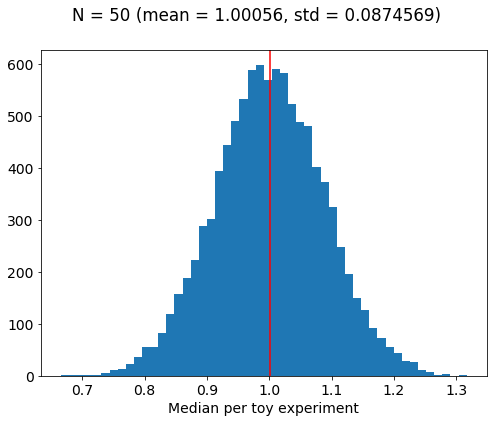

In [107]:
do_plot(50)

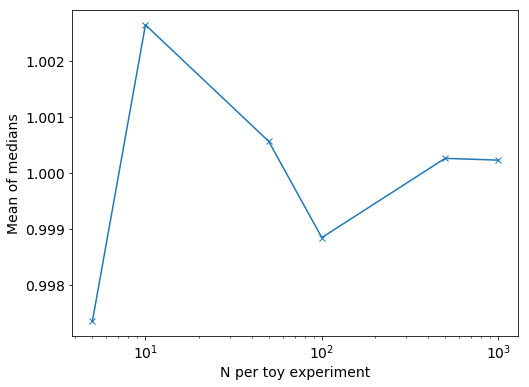

In [147]:
plt.plot(N_ENTRIES, [results_normal[k].mean() for k in N_ENTRIES], 'x-');
plt.xlabel("N per toy experiment");
plt.ylabel("Mean of medians");
plt.xscale('log');

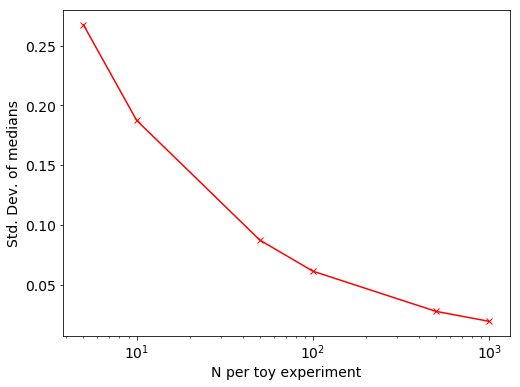

In [146]:
plt.plot(N_ENTRIES, [results_normal[k].std() for k in N_ENTRIES], 'x-r');
plt.xlabel("N per toy experiment");
plt.ylabel("Std. Dev. of medians");
plt.xscale('log');

So nothing shocking here: the median, on average, captures the true median well even for low N. And as N increases, the variance of the median gets smaller, again no big surprise.

## Non-normal distributions

We'll use an asymmetric distribution:

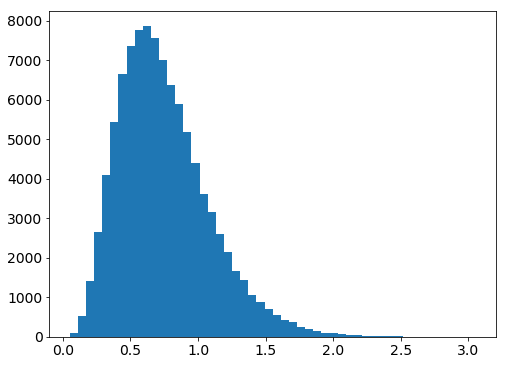

In [4]:
plt.hist(np.random.gamma(5, 0.15, size=100000), bins=50);

In [5]:
def run_toy_experiments_nonnormal(n_toys, n_entries):
    data = np.random.gamma(5, 0.15, size=(n_toys, n_entries))
    return np.median(data, axis=1)

In [6]:
results_nonnormal = {}
# N_ENTRIES = [5, 10, 20, 30, 40, 50, 60, 70, 100, 200, 500, 1000]
N_ENTRIES = np.logspace(0.9, 3.0, num=10, base=10).astype(int)
N_TRIALS = 10000
for N in N_ENTRIES:
    data_nonnormal = run_toy_experiments_nonnormal(N_TRIALS, int(N))
    results_nonnormal[N] = data_nonnormal

In [7]:
N_ENTRIES

array([   7,   13,   23,   39,   68,  116,  199,  341,  584, 1000])

In [8]:
def do_plot(this_n):
    plt.hist(results_nonnormal[this_n], bins=50);
    this_mean = results_nonnormal[this_n].mean()
    this_std = results_nonnormal[this_n].std()
    plt.axvline(this_mean, color='red', label='mean');
    plt.axvline(list(results_nonnormal.values())[-1].mean(), color='orange', label='true mean', linestyle='dashed');
    plt.suptitle("N = %d (mean = %g, std = %g)" % (this_n, this_mean, this_std));
    plt.xlabel("Median per toy experiment");
    plt.legend();

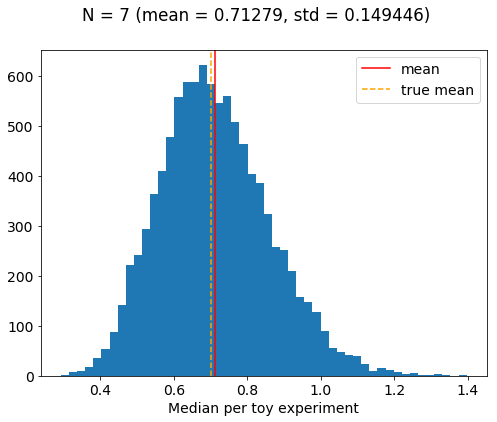

In [9]:
do_plot(N_ENTRIES[0])

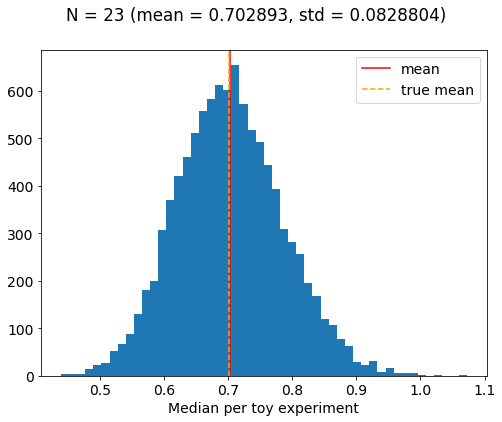

In [10]:
do_plot(N_ENTRIES[2])

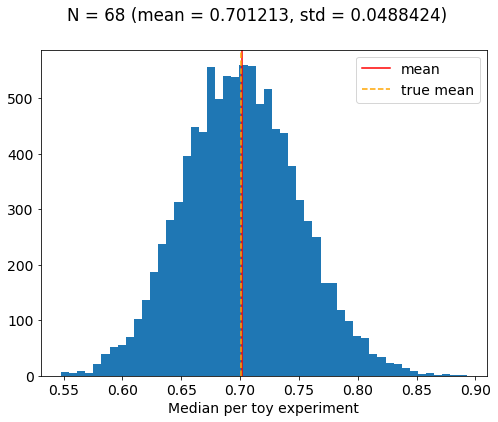

In [11]:
do_plot(N_ENTRIES[4])

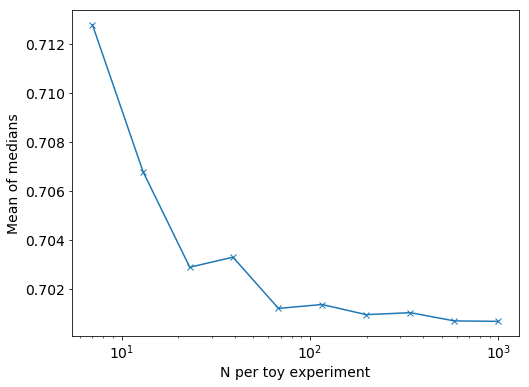

In [13]:
plt.plot(N_ENTRIES, [results_nonnormal[k].mean() for k in N_ENTRIES], 'x-');
plt.xlabel("N per toy experiment");
plt.ylabel("Mean of medians");
plt.xscale('log');

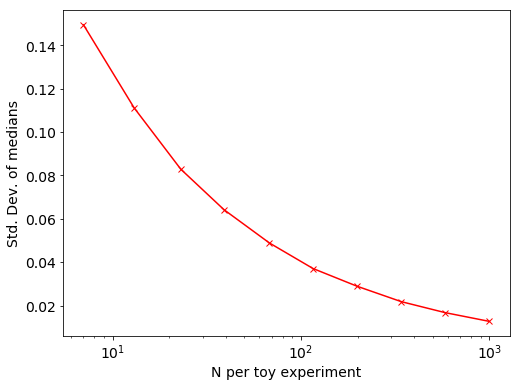

In [14]:
plt.plot(N_ENTRIES, [results_nonnormal[k].std() for k in N_ENTRIES], 'x-r');
plt.xlabel("N per toy experiment");
plt.ylabel("Std. Dev. of medians");
plt.xscale('log');

So we can see that at low N, the median is over-estimated by 1-2%, and it convereges at about N=50-100

What about just the raw mean?

In [261]:
def run_toy_experiments_nonnormal_mean(n_toys, n_entries):
    data = np.random.gamma(5, 0.15, size=(n_toys, n_entries))
    return np.mean(data, axis=1)

In [262]:
results_nonnormal_mean = {}
N_ENTRIES = np.logspace(0.9, 3.0, num=10, base=10).astype(int)
N_TRIALS = 100000
for N in N_ENTRIES:
    data_nonnormal = run_toy_experiments_nonnormal_mean(N_TRIALS, int(N))
    results_nonnormal_mean[N] = data_nonnormal

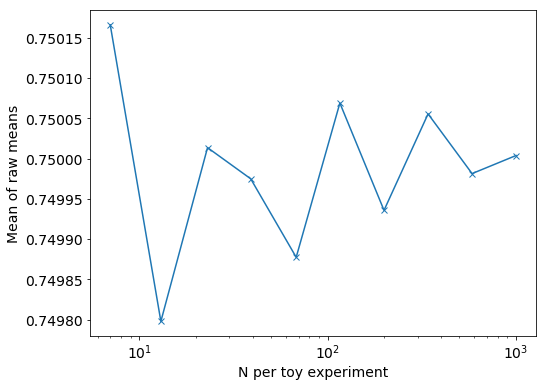

In [266]:
plt.plot(N_ENTRIES, [results_nonnormal_mean[k].mean() for k in N_ENTRIES], 'x-');
plt.xlabel("N per toy experiment");
plt.ylabel("Mean of raw means");
plt.xscale('log');

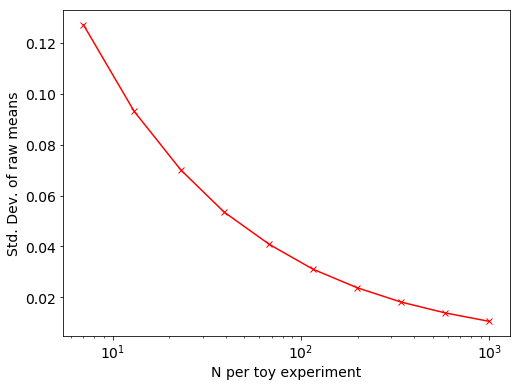

In [265]:
plt.plot(N_ENTRIES, [results_nonnormal_mean[k].std() for k in N_ENTRIES], 'x-r');
plt.xlabel("N per toy experiment");
plt.ylabel("Std. Dev. of raw means");
plt.xscale('log');

So the raw mean is not a biased estimator.